In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.26/04


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/DQ_250GeV_ss.minp10.distcut.polar.root")
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/DQ_250GeV_ss.minp10.distcut.polar.true.root")

# file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp10maxp60.hit210.offset.dEdxMin.root")
# file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.root")

# file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp10maxp60.hit210.offset.dEdxMin.cheat.root")

file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.OppKMult.KPicross.K_cos.AllEvents.root")



In [4]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetLineColor(color)
    p.SetFillColor(color)
    p.SetFillStyle(3003)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in gDirectory.GetListOfKeys()]
    
def Normal(h1):
    h1.Scale(1.0/h1.GetEntries())
    
def Normal2(h1):
    h1.Scale(1.0/h1.Integral(12,88))

In [5]:
TFile.GetKeyNames = GetKeyNames
keyList = file1.GetKeyNames()
# print(keyList)

In [6]:
h_pfo_nKaons_wrong0 = file1.Get("h_pfo_nKaons_wrong0")
h_pfo_nKaons_wrong1 = file1.Get("h_pfo_nKaons_wrong1")
h_pfo_nKaons_correct0 = file1.Get("h_pfo_nKaons_correct0")
h_pfo_nKaons_correct1 = file1.Get("h_pfo_nKaons_correct1")

makePretty(h_pfo_nKaons_wrong0,kBlack)
makePretty(h_pfo_nKaons_wrong1,kBlack)
makePretty(h_pfo_nKaons_correct0,kBlue)
makePretty(h_pfo_nKaons_correct1,kBlue)

In [7]:
Normal(h_pfo_nKaons_wrong0)
Normal(h_pfo_nKaons_wrong1)
Normal(h_pfo_nKaons_correct0)
Normal(h_pfo_nKaons_correct1)

## Kaon mult Jet0

In [8]:
c1 = TCanvas("c1","c1",500,500)

In [9]:
h_pfo_nKaons_correct0.Draw("h")
h_pfo_nKaons_wrong0.Draw("hsame")

In [10]:
leg = TLegend(0.5,0.85,0.75,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.03)
leg.AddEntry(h_pfo_nKaons_correct0,"Correct","fp")
leg.AddEntry(h_pfo_nKaons_wrong0,"Migration","fp")
leg.Draw()

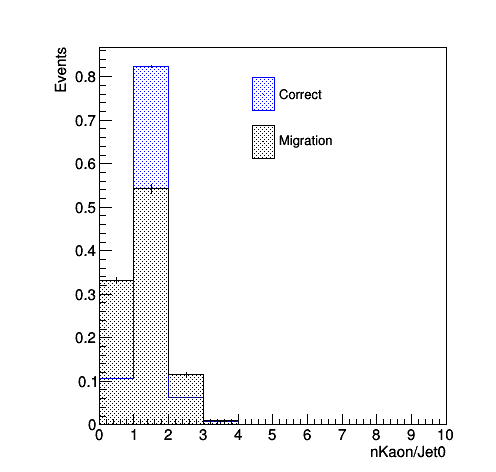

In [11]:
c1.Draw()

## Kaon mult Jet1

In [12]:
c2 = TCanvas("c2","c2",500,500)

In [13]:
h_pfo_nKaons_correct1.Draw("h")
h_pfo_nKaons_wrong1.Draw("hsame")

In [14]:
leg = TLegend(0.5,0.85,0.75,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.03)
leg.AddEntry(h_pfo_nKaons_correct1,"Correct","fp")
leg.AddEntry(h_pfo_nKaons_wrong1,"Migration","fp")
leg.Draw()

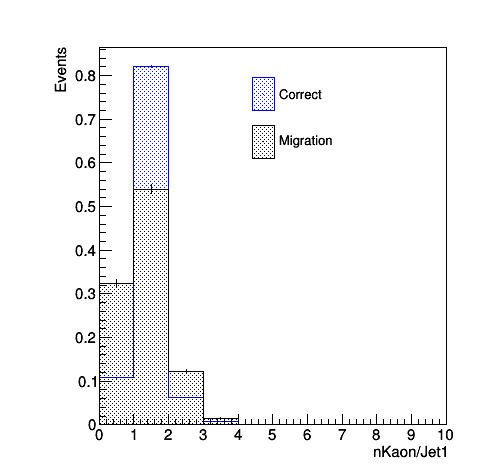

In [15]:
c2.Draw()

## Kaon mult Migration

In [16]:
h_pfo_LeadK_pdg_wrong      = file1.Get("h_pfo_LeadK_pdg_wrong")
h_pfo_LeadK_pdg_wrong_pcut = file1.Get("h_pfo_LeadK_pdg_wrong_pcut")

In [17]:
c3 = TCanvas("c3","c3",500,500)

In [18]:
h_pfo_LeadK_pdg_wrong.SetTitle("")
h_pfo_LeadK_pdg_wrong.Draw("text,colz")

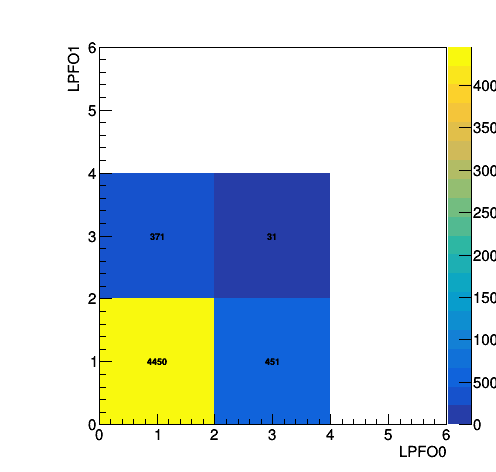

In [19]:
c3.Draw()

In [20]:
c4 = TCanvas("c4","c4",500,500)

In [21]:
h_pfo_LeadK_pdg_wrong_pcut.SetTitle("")
h_pfo_LeadK_pdg_wrong_pcut.Draw("text,colz")

AttributeError: 'TObject' object has no attribute 'SetTitle'

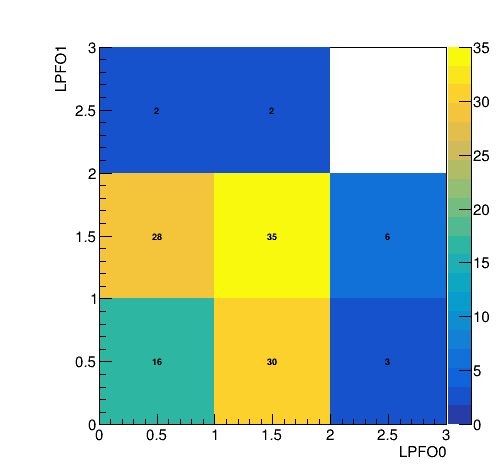

In [ ]:
c4.Draw()

In [ ]:
print(h_pfo_LeadK_pdg_wrong_pcut.GetEntries())

122.0


## Appendix

### Legend
```python
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_nKaons_evt,"All","fp")
leg.AddEntry(h_pfo_nKaons_evt_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_nKaons_evt_ss,"s#bar{s}","fp")
leg.Draw()
```